# [Lab3] Î™®Îç∏ ÏÑ±Îä• ÌèâÍ∞Ä Î∞è ÎπÑÍµê

Ïù¥ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑúÎäî ÌõàÎ†®Îêú Îëê Î™®Îç∏Ïùò ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌïòÍ≥† ÎπÑÍµêÌï©ÎãàÎã§.

## Ï£ºÏöî ÎÇ¥Ïö©
- Î°úÏª¨ ÌôòÍ≤ΩÏóêÏÑú Î™®Îç∏ ÌÖåÏä§Ìä∏
- Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê Î∞è ÌèâÍ∞Ä
- ÌòºÎèô ÌñâÎ†¨ Î∞è Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏ ÏÉùÏÑ±
- MLflowÎ•º ÌÜµÌïú Ïã§Ìóò Ï∂îÏ†Å
- ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÏÑ†ÌÉù

## 1. ÌôòÍ≤Ω ÏÑ§Ï†ï Î∞è Î≥ÄÏàò Î°úÎìú

In [1]:
# Ïù¥Ï†Ñ ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú Ï†ÄÏû•Ìïú Î≥ÄÏàòÎì§ Î°úÎìú
%store -r

print("‚úÖ Ï†ÄÏû•Îêú Î≥ÄÏàòÎì§ÏùÑ Î°úÎìúÌñàÏäµÎãàÎã§.")
print(f"   - Îì±Î°ùÎêú Î™®Îç∏ Ïù¥Î¶Ñ: {registered_model_name}")
print(f"   - Î™®Îç∏ Î≤ÑÏ†Ñ 1: {registered_model_version_1.version}")
print(f"   - Î™®Îç∏ Î≤ÑÏ†Ñ 2: {registered_model_version_2.version}")
print(f"   - MLflow Ïã§Ìñâ ID: {run_id}")

‚úÖ Ï†ÄÏû•Îêú Î≥ÄÏàòÎì§ÏùÑ Î°úÎìúÌñàÏäµÎãàÎã§.
   - Îì±Î°ùÎêú Î™®Îç∏ Ïù¥Î¶Ñ: bank-marketing-model-00
   - Î™®Îç∏ Î≤ÑÏ†Ñ 1: 1
   - Î™®Îç∏ Î≤ÑÏ†Ñ 2: 2
   - MLflow Ïã§Ìñâ ID: 38d64b0d82594bb4b8ce2adb34d246c5


In [2]:
# ÌïÑÏàò ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
import sagemaker
import boto3
import mlflow
import pandas as pd
import numpy as np
import xgboost as xgb
import os
from time import gmtime, strftime
from sklearn.metrics import roc_auc_score, accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, RocCurveDisplay
from sklearn import metrics
import matplotlib.pyplot as plt
from sagemaker_studio import Project

# AWS ÏÑ∏ÏÖò Ï¥àÍ∏∞Ìôî
boto_session = boto3.Session()
sess = sagemaker.Session()

print("‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è ÏÑ∏ÏÖò Ï¥àÍ∏∞Ìôî ÏôÑÎ£å")

sagemaker.config INFO - Fetched defaults config from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/sagemaker-user/.config/sagemaker/config.yaml
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3Bucket
sagemaker.config INFO - Applied value from config key = SageMaker.PythonSDK.Modules.Session.DefaultS3ObjectKeyPrefix
‚úÖ ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏ Î∞è ÏÑ∏ÏÖò Ï¥àÍ∏∞Ìôî ÏôÑÎ£å


## 2. ÌîÑÎ°úÏ†ùÌä∏ Î∞è MLflow ÏÑ§Ï†ï

Project ÌÅ¥ÎûòÏä§Î•º ÏÇ¨Ïö©ÌïòÏó¨ ÏùºÍ¥ÄÎêú Î¶¨ÏÜåÏä§ Ï†ëÍ∑ºÏùÑ ÏÑ§Ï†ïÌï©ÎãàÎã§.

In [4]:
# ÌîÑÎ°úÏ†ùÌä∏ Î∞è MLflow ÏÑ§Ï†ï
project = Project()
arn = project.mlflow_tracking_server_arn
role = project.iam_role
domain_id = project.domain_id
project_id= project.id

# MLflow Ïó∞Í≤∞
mlflow.set_tracking_uri(arn)

print(f"‚úÖ ÌîÑÎ°úÏ†ùÌä∏ Î∞è MLflow ÏÑ§Ï†ï ÏôÑÎ£å")
print(f"   - MLflow URI: {arn}")
print(f"   - IAM Ïó≠Ìï†: {role}")
print(f"   - Îì±Î°ùÎêú Î™®Îç∏ Ïù¥Î¶Ñ: {registered_model_name}")

‚úÖ ÌîÑÎ°úÏ†ùÌä∏ Î∞è MLflow ÏÑ§Ï†ï ÏôÑÎ£å
   - MLflow URI: arn:aws:sagemaker:us-west-2:381492282995:mlflow-tracking-server/tracking-server-5rxp31psrq0nio-afgfy6qx9dz3f4-dev
   - IAM Ïó≠Ìï†: arn:aws:iam::381492282995:role/datazone_usr_role_5rxp31psrq0nio_50ixpgyihxe9zk
   - Îì±Î°ùÎêú Î™®Îç∏ Ïù¥Î¶Ñ: bank-marketing-model-00


## 3. ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú

Ï†ÑÏ≤òÎ¶¨Îêú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î•º Î°úÎìúÌïòÏó¨ Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.

In [5]:
# ÏûÑÏãú ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ±
!mkdir -p tmp

print("‚úÖ ÏûÑÏãú ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± ÏôÑÎ£å")

‚úÖ ÏûÑÏãú ÎîîÎ†âÌÜ†Î¶¨ ÏÉùÏÑ± ÏôÑÎ£å


In [6]:
# S3ÏóêÏÑú ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú
print("üì• ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Ï§ë...")

!aws s3 cp $test_path/test_x.csv tmp/test_x.csv
!aws s3 cp $test_path/test_y.csv tmp/test_y.csv

print("‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú ÏôÑÎ£å")
print(f"   - ÌäπÏÑ± Îç∞Ïù¥ÌÑ∞: tmp/test_x.csv")
print(f"   - Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞: tmp/test_y.csv")

üì• ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú Ï§ë...
download: s3://amazon-sagemaker-381492282995-us-west-2-c493b330dbe7/dzd_bm8pauw94tnlxs/5rxp31psrq0nio/dev/sagemaker/DEMO-xgboost-dm/test/test_x.csv to tmp/test_x.csv
download: s3://amazon-sagemaker-381492282995-us-west-2-c493b330dbe7/dzd_bm8pauw94tnlxs/5rxp31psrq0nio/dev/sagemaker/DEMO-xgboost-dm/test/test_y.csv to tmp/test_y.csv
‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Îã§Ïö¥Î°úÎìú ÏôÑÎ£å
   - ÌäπÏÑ± Îç∞Ïù¥ÌÑ∞: tmp/test_x.csv
   - Î†àÏù¥Î∏î Îç∞Ïù¥ÌÑ∞: tmp/test_y.csv


In [7]:
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú
print("üìä ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë...")

test_x = pd.read_csv('tmp/test_x.csv', names=[f'{i}' for i in range(59)])
test_y = pd.read_csv('tmp/test_y.csv', names=['y'])

print(f"‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å")
print(f"   - ÌÖåÏä§Ìä∏ ÏÉòÌîå Ïàò: {len(test_x)}")
print(f"   - ÌäπÏÑ± Ïàò: {test_x.shape[1]}")
print(f"   - ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÎπÑÏú®: {test_y['y'].mean():.3f}")

# Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞
print(f"\nüìã Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:")
print(f"   - ÌäπÏÑ± Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: {test_x.shape}")
print(f"   - Î†àÏù¥Î∏î Î∂ÑÌè¨: {test_y['y'].value_counts().to_dict()}")

üìä ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú Ï§ë...
‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ Î°úÎìú ÏôÑÎ£å
   - ÌÖåÏä§Ìä∏ ÏÉòÌîå Ïàò: 4119
   - ÌäπÏÑ± Ïàò: 59
   - ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÎπÑÏú®: 0.118

üìã Îç∞Ïù¥ÌÑ∞ ÎØ∏Î¶¨Î≥¥Í∏∞:
   - ÌäπÏÑ± Îç∞Ïù¥ÌÑ∞ ÌòïÌÉú: (4119, 59)
   - Î†àÏù¥Î∏î Î∂ÑÌè¨: {0: 3635, 1: 484}


## 4. Î™®Îç∏ Î°úÎìú Ìï®Ïàò Ï†ïÏùò

MLflow Model RegistryÏôÄ S3ÏóêÏÑú Î™®Îç∏ÏùÑ Î°úÎìúÌïòÎäî Ìï®ÏàòÎì§ÏùÑ Ï†ïÏùòÌï©ÎãàÎã§.

In [8]:
# Îì±Î°ùÎêú Î™®Îç∏ ÏÉÅÌÉú ÌôïÏù∏
try:
    client = mlflow.MlflowClient()
    
    # Î™®Îç∏ Î≤ÑÏ†Ñ Ï†ïÎ≥¥ ÌôïÏù∏
    model_version_1 = client.get_model_version(
        name=registered_model_name,
        version=registered_model_version_1.version
    )
    
    print(f"üìã Î™®Îç∏ 1 Ï†ïÎ≥¥:")
    print(f"   - Ïù¥Î¶Ñ: {model_version_1.name}")
    print(f"   - Î≤ÑÏ†Ñ: {model_version_1.version}")
    print(f"   - ÏÉÅÌÉú: {model_version_1.status}")
    print(f"   - Îã®Í≥Ñ: {model_version_1.current_stage}")
    print(f"   - ÏÜåÏä§: {model_version_1.source}")
    
    MODEL_REGISTRY_AVAILABLE = True
    
except Exception as e:
    print(f"‚ö†Ô∏è Model Registry Ï†ëÍ∑º Ïã§Ìå®: {e}")
    print("S3ÏóêÏÑú ÏßÅÏ†ë Î™®Îç∏ÏùÑ Î°úÎìúÌï©ÎãàÎã§.")
    MODEL_REGISTRY_AVAILABLE = False

üìã Î™®Îç∏ 1 Ï†ïÎ≥¥:
   - Ïù¥Î¶Ñ: bank-marketing-model-00
   - Î≤ÑÏ†Ñ: 1
   - ÏÉÅÌÉú: READY
   - Îã®Í≥Ñ: None
   - ÏÜåÏä§: s3://amazon-sagemaker-381492282995-us-west-2-c493b330dbe7/dzd_bm8pauw94tnlxs/5rxp31psrq0nio/dev/data/ml/mlflow/1/38d64b0d82594bb4b8ce2adb34d246c5/artifacts/model1


In [9]:
# 4-test-and-deploy.ipynbÏóêÏÑú ÏÇ¨Ïö©Ìï† Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ±
# Ïù¥ Î≥ÄÏàòÎì§ÏùÄ 2-training.ipynbÏóêÏÑú ÏÉùÏÑ±Îêú Í≤ÉÎì§ÏùÑ Ï∞∏Ï°∞Ìï©ÎãàÎã§

print("üîß Î∞∞Ìè¨Ïö© Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ± Ï§ë...")

try:
    # 2-training.ipynbÏóêÏÑú Ï†ÄÏû•Îêú Î≥ÄÏàòÎì§Ïù¥ ÏûàÎäîÏßÄ ÌôïÏù∏
    if 'xgb1' in locals() and 'xgb2' in locals():
        print("‚úÖ ÌõàÎ†® Îã®Í≥ÑÏóêÏÑú ÏÉùÏÑ±Îêú Î™®Îç∏ Í∞ùÏ≤¥Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.")
        print(f"   - xgb1 Î™®Îç∏ Îç∞Ïù¥ÌÑ∞: {xgb1.model_data}")
        print(f"   - xgb2 Î™®Îç∏ Îç∞Ïù¥ÌÑ∞: {xgb2.model_data}")
    else:
        print("‚ö†Ô∏è ÌõàÎ†® Îã®Í≥ÑÏùò Î™®Îç∏ Í∞ùÏ≤¥Í∞Ä ÏóÜÏäµÎãàÎã§.")
        print("   Î∞∞Ìè¨ Îã®Í≥ÑÏóêÏÑú ÏßÅÏ†ë Î™®Îç∏ URIÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò")
        print("   2-training.ipynbÎ•º Îã§Ïãú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
        
        # ÎåÄÏïà: Ï†ÄÏû•Îêú Î™®Îç∏ URI ÏÇ¨Ïö© (ÏûàÎã§Î©¥)
        if 'model1_uri' in locals() and 'model2_uri' in locals():
            print("\nüí° Ï†ÄÏû•Îêú Î™®Îç∏ URIÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§:")
            print(f"   - Î™®Îç∏ 1 URI: {model1_uri}")
            print(f"   - Î™®Îç∏ 2 URI: {model2_uri}")
            
            # Í∞ÑÎã®Ìïú Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ± (URIÎßå Ìè¨Ìï®)
            class SimpleModelRef:
                def __init__(self, model_data):
                    self.model_data = model_data
            
            xgb1 = SimpleModelRef(model1_uri)
            xgb2 = SimpleModelRef(model2_uri)
            
            print("‚úÖ Í∞ÑÎã®Ìïú Î™®Îç∏ Ï∞∏Ï°∞ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.")
        else:
            print("\n‚ùå Î™®Îç∏ URIÎèÑ ÏóÜÏäµÎãàÎã§. 2-training.ipynbÎ•º Î®ºÏ†Ä Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.")
            
except Exception as e:
    print(f"‚ùå Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ± Ïã§Ìå®: {e}")

# Î≥ÄÏàò Ï†ÄÏû• (Îã§Ïùå ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©)
if 'xgb1' in locals() and 'xgb2' in locals():
    %store xgb1
    %store xgb2
    print("\nüíæ Î™®Îç∏ Í∞ùÏ≤¥Î•º Ï†ÄÏû•ÌñàÏäµÎãàÎã§ (xgb1, xgb2)")
else:
    print("\n‚ö†Ô∏è Ï†ÄÏû•Ìï† Î™®Îç∏ Í∞ùÏ≤¥Í∞Ä ÏóÜÏäµÎãàÎã§.")

üîß Î∞∞Ìè¨Ïö© Î™®Îç∏ Í∞ùÏ≤¥ ÏÉùÏÑ± Ï§ë...
‚ö†Ô∏è ÌõàÎ†® Îã®Í≥ÑÏùò Î™®Îç∏ Í∞ùÏ≤¥Í∞Ä ÏóÜÏäµÎãàÎã§.
   Î∞∞Ìè¨ Îã®Í≥ÑÏóêÏÑú ÏßÅÏ†ë Î™®Îç∏ URIÎ•º ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò
   2-training.ipynbÎ•º Îã§Ïãú Ïã§ÌñâÌï¥Ï£ºÏÑ∏Ïöî.

üí° Ï†ÄÏû•Îêú Î™®Îç∏ URIÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§:
   - Î™®Îç∏ 1 URI: s3://amazon-sagemaker-381492282995-us-west-2-c493b330dbe7/dzd_bm8pauw94tnlxs/5rxp31psrq0nio/dev/sagemaker/DEMO-xgboost-dm/output/conservative-xgb-training-2025-06-24-15-51-01-258/output/model.tar.gz
   - Î™®Îç∏ 2 URI: s3://amazon-sagemaker-381492282995-us-west-2-c493b330dbe7/dzd_bm8pauw94tnlxs/5rxp31psrq0nio/dev/sagemaker/DEMO-xgboost-dm/output/aggressive-xgb-training-2025-06-24-15-51-04-847/output/model.tar.gz
‚úÖ Í∞ÑÎã®Ìïú Î™®Îç∏ Ï∞∏Ï°∞ Í∞ùÏ≤¥Î•º ÏÉùÏÑ±ÌñàÏäµÎãàÎã§.
Proper storage of interactively declared classes (or instances
of those classes) is not possible! Only instances
of classes in real modules on file system can be %store'd.

Proper storage of interactively declared classes (or instances
of those classes)

In [10]:
def load_model_from_s3(model_data_uri, model_name="model"):
    """S3ÏóêÏÑú ÏßÅÏ†ë XGBoost Î™®Îç∏ÏùÑ Î°úÎìúÌïòÎäî Ìï®Ïàò"""
    import boto3
    import tarfile
    import pickle as pkl
    import os
    
    try:
        print(f"üì• {model_name} S3ÏóêÏÑú Î°úÎìú Ï§ë: {model_data_uri}")
        
        # S3ÏóêÏÑú Î™®Îç∏ Îã§Ïö¥Î°úÎìú
        model_file = f"./tmp/{model_name}-model.tar.gz"
        os.makedirs('./tmp', exist_ok=True)
        
        bucket, key = model_data_uri.replace("s3://", "").split("/", 1)
        boto3.client("s3").download_file(bucket, key, model_file)
        
        # ÏïïÏ∂ï Ìï¥Ï†ú
        with tarfile.open(model_file, "r:gz") as t:
            t.extractall(path="./tmp")
        
        # Î™®Îç∏ Î°úÎìú
        model_path = "./tmp/xgboost-model"
        with open(model_path, "rb") as f:
            model = pkl.load(f)
        
        print(f"‚úÖ {model_name} Î°úÎìú ÏÑ±Í≥µ")
        return model
        
    except Exception as e:
        print(f"‚ùå {model_name} Î°úÎìú Ïã§Ìå®: {e}")
        return None

def load_model_from_mlflow(model_name, version):
    """MLflow Model RegistryÏóêÏÑú Î™®Îç∏ÏùÑ Î°úÎìúÌïòÎäî Ìï®Ïàò"""
    try:
        model_uri = f"models:/{model_name}/{version}"
        print(f"üì• MLflowÏóêÏÑú Î™®Îç∏ Î°úÎìú Ï§ë: {model_uri}")
        
        model = mlflow.xgboost.load_model(model_uri)
        print(f"‚úÖ MLflow Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ")
        return model
        
    except Exception as e:
        print(f"‚ùå MLflow Î™®Îç∏ Î°úÎìú Ïã§Ìå®: {e}")
        return None

print("‚úÖ Î™®Îç∏ Î°úÎìú Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å")

‚úÖ Î™®Îç∏ Î°úÎìú Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å


## 5. Î™®Îç∏ 1 ÌÖåÏä§Ìä∏ (Î≥¥ÏàòÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

Ï≤´ Î≤àÏß∏ Î™®Îç∏ÏùÑ Î°úÎìúÌïòÍ≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [11]:
# Ï≤´ Î≤àÏß∏ Î™®Îç∏ Î°úÎìú Î∞è ÌÖåÏä§Ìä∏
print("üîç Ï≤´ Î≤àÏß∏ Î™®Îç∏ (Î≥¥ÏàòÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞) ÌÖåÏä§Ìä∏")

model1 = None

# Î∞©Î≤ï 1: MLflow Model RegistryÏóêÏÑú Î°úÎìú ÏãúÎèÑ
if MODEL_REGISTRY_AVAILABLE:
    model1 = load_model_from_mlflow(registered_model_name, registered_model_version_1.version)

# Î∞©Î≤ï 2: MLflow Ïã§Ìå® Ïãú S3ÏóêÏÑú ÏßÅÏ†ë Î°úÎìú
if model1 is None:
    print("MLflow Î°úÎìú Ïã§Ìå®, S3ÏóêÏÑú ÏßÅÏ†ë Î°úÎìú ÏãúÎèÑ...")
    model1 = load_model_from_s3(xgb1.model_data, "model1")

# Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ Ïãú ÏòàÏ∏° ÏàòÌñâ
if model1 is not None:
    print("\nüìä Ï≤´ Î≤àÏß∏ Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ Ï§ë...")
    
    # XGBoost DMatrix ÏÉùÏÑ±
    dtest = xgb.DMatrix(test_x)
    
    # ÏòàÏ∏° ÏàòÌñâ
    predictions1 = model1.predict(dtest)
    predictions1 = np.array(predictions1, dtype=float).squeeze()
    
    print(f"‚úÖ ÏòàÏ∏° ÏôÑÎ£å")
    print(f"   - ÏòàÏ∏° ÏÉòÌîå Ïàò: {len(predictions1)}")
    print(f"   - ÏòàÏ∏°Í∞í Î≤îÏúÑ: {predictions1.min():.4f} ~ {predictions1.max():.4f}")
    print(f"   - ÌèâÍ∑† ÏòàÏ∏°Í∞í: {predictions1.mean():.4f}")
    
    # ÏòàÏ∏° Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞
    print(f"\nüìã Ï≤´ 10Í∞ú ÏòàÏ∏°Í∞í:")
    for i in range(min(10, len(predictions1))):
        print(f"   ÏÉòÌîå {i+1}: {predictions1[i]:.4f}")
        
else:
    print("‚ùå Ï≤´ Î≤àÏß∏ Î™®Îç∏ Î°úÎìú Ïã§Ìå®")
    predictions1 = None

üîç Ï≤´ Î≤àÏß∏ Î™®Îç∏ (Î≥¥ÏàòÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞) ÌÖåÏä§Ìä∏
üì• MLflowÏóêÏÑú Î™®Îç∏ Î°úÎìú Ï§ë: models:/bank-marketing-model-00/1


‚úÖ MLflow Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ

üìä Ï≤´ Î≤àÏß∏ Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ Ï§ë...
‚úÖ ÏòàÏ∏° ÏôÑÎ£å
   - ÏòàÏ∏° ÏÉòÌîå Ïàò: 4119
   - ÏòàÏ∏°Í∞í Î≤îÏúÑ: 0.0066 ~ 0.8984
   - ÌèâÍ∑† ÏòàÏ∏°Í∞í: 0.1126

üìã Ï≤´ 10Í∞ú ÏòàÏ∏°Í∞í:
   ÏÉòÌîå 1: 0.0869
   ÏÉòÌîå 2: 0.0899
   ÏÉòÌîå 3: 0.0635
   ÏÉòÌîå 4: 0.0954
   ÏÉòÌîå 5: 0.0551
   ÏÉòÌîå 6: 0.0414
   ÏÉòÌîå 7: 0.0308
   ÏÉòÌîå 8: 0.0537
   ÏÉòÌîå 9: 0.0970
   ÏÉòÌîå 10: 0.0855


## 6. Î™®Îç∏ 2 ÌÖåÏä§Ìä∏ (Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞)

Îëê Î≤àÏß∏ Î™®Îç∏ÏùÑ Î°úÎìúÌïòÍ≥† ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°ú ÏòàÏ∏°ÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [12]:
# Îëê Î≤àÏß∏ Î™®Îç∏ Î°úÎìú Î∞è ÌÖåÏä§Ìä∏
print("üîç Îëê Î≤àÏß∏ Î™®Îç∏ (Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞) ÌÖåÏä§Ìä∏")

model2 = None

# Î∞©Î≤ï 1: MLflow Model RegistryÏóêÏÑú Î°úÎìú ÏãúÎèÑ
if MODEL_REGISTRY_AVAILABLE:
    model2 = load_model_from_mlflow(registered_model_name, registered_model_version_2.version)

# Î∞©Î≤ï 2: MLflow Ïã§Ìå® Ïãú S3ÏóêÏÑú ÏßÅÏ†ë Î°úÎìú
if model2 is None:
    print("MLflow Î°úÎìú Ïã§Ìå®, S3ÏóêÏÑú ÏßÅÏ†ë Î°úÎìú ÏãúÎèÑ...")
    model2 = load_model_from_s3(xgb2.model_data, "model2")

# Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ Ïãú ÏòàÏ∏° ÏàòÌñâ
if model2 is not None:
    print("\nüìä Îëê Î≤àÏß∏ Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ Ï§ë...")
    
    # XGBoost DMatrix ÏÉùÏÑ±
    dtest = xgb.DMatrix(test_x)
    
    # ÏòàÏ∏° ÏàòÌñâ
    predictions2 = model2.predict(dtest)
    predictions2 = np.array(predictions2, dtype=float).squeeze()
    
    print(f"‚úÖ ÏòàÏ∏° ÏôÑÎ£å")
    print(f"   - ÏòàÏ∏° ÏÉòÌîå Ïàò: {len(predictions2)}")
    print(f"   - ÏòàÏ∏°Í∞í Î≤îÏúÑ: {predictions2.min():.4f} ~ {predictions2.max():.4f}")
    print(f"   - ÌèâÍ∑† ÏòàÏ∏°Í∞í: {predictions2.mean():.4f}")
    
    # ÏòàÏ∏° Í≤∞Í≥º ÎØ∏Î¶¨Î≥¥Í∏∞
    print(f"\nüìã Ï≤´ 10Í∞ú ÏòàÏ∏°Í∞í:")
    for i in range(min(10, len(predictions2))):
        print(f"   ÏÉòÌîå {i+1}: {predictions2[i]:.4f}")
        
else:
    print("‚ùå Îëê Î≤àÏß∏ Î™®Îç∏ Î°úÎìú Ïã§Ìå®")
    predictions2 = None

üîç Îëê Î≤àÏß∏ Î™®Îç∏ (Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞) ÌÖåÏä§Ìä∏
üì• MLflowÏóêÏÑú Î™®Îç∏ Î°úÎìú Ï§ë: models:/bank-marketing-model-00/2


‚úÖ MLflow Î™®Îç∏ Î°úÎìú ÏÑ±Í≥µ

üìä Îëê Î≤àÏß∏ Î™®Îç∏Î°ú ÏòàÏ∏° ÏàòÌñâ Ï§ë...
‚úÖ ÏòàÏ∏° ÏôÑÎ£å
   - ÏòàÏ∏° ÏÉòÌîå Ïàò: 4119
   - ÏòàÏ∏°Í∞í Î≤îÏúÑ: 0.0164 ~ 0.8906
   - ÌèâÍ∑† ÏòàÏ∏°Í∞í: 0.1141

üìã Ï≤´ 10Í∞ú ÏòàÏ∏°Í∞í:
   ÏÉòÌîå 1: 0.1007
   ÏÉòÌîå 2: 0.1040
   ÏÉòÌîå 3: 0.0886
   ÏÉòÌîå 4: 0.0950
   ÏÉòÌîå 5: 0.0681
   ÏÉòÌîå 6: 0.0432
   ÏÉòÌîå 7: 0.0417
   ÏÉòÌîå 8: 0.0802
   ÏÉòÌîå 9: 0.0970
   ÏÉòÌîå 10: 0.0869


## 7. Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê

Îëê Î™®Îç∏Ïùò ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÎπÑÍµêÌïòÍ≥† ÏÑ±Îä•ÏùÑ ÌèâÍ∞ÄÌï©ÎãàÎã§.

In [13]:
# Îëê Î™®Îç∏ Î™®Îëê Î°úÎìú ÏÑ±Í≥µÌïú Í≤ΩÏö∞ ÏÑ±Îä• ÎπÑÍµê
if predictions1 is not None and predictions2 is not None:
    print("üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê")
    print("=" * 50)
    
    # Ïù¥ÏßÑ Î∂ÑÎ•òÎ•º ÏúÑÌïú ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï (0.5)
    pred1_binary = (predictions1 > 0.5).astype(int)
    pred2_binary = (predictions2 > 0.5).astype(int)
    
    # Ïã§Ï†ú Î†àÏù¥Î∏î
    y_true = test_y['y'].values
    
    # AUC Ï†êÏàò
    auc1 = roc_auc_score(y_true, predictions1)
    auc2 = roc_auc_score(y_true, predictions2)
    
    # Ï†ïÌôïÎèÑ
    acc1 = accuracy_score(y_true, pred1_binary)
    acc2 = accuracy_score(y_true, pred2_binary)
    
    print(f"ü•á Î™®Îç∏ 1 (Î≥¥ÏàòÏ†Å):")
    print(f"   - AUC: {auc1:.4f}")
    print(f"   - Ï†ïÌôïÎèÑ: {acc1:.4f}")
    
    print(f"\nü•à Î™®Îç∏ 2 (Ï†ÅÍ∑πÏ†Å):")
    print(f"   - AUC: {auc2:.4f}")
    print(f"   - Ï†ïÌôïÎèÑ: {acc2:.4f}")
    
    # ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ ÏÑ†ÌÉù
    if auc1 > auc2:
        print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä•: Î™®Îç∏ 1 (AUC: {auc1:.4f})")
        best_model = model1
        best_predictions = predictions1
        best_model_name = "Î≥¥ÏàòÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏"
        best_model_version = registered_model_version_1
    else:
        print(f"\nüèÜ ÏµúÍ≥† ÏÑ±Îä•: Î™®Îç∏ 2 (AUC: {auc2:.4f})")
        best_model = model2
        best_predictions = predictions2
        best_model_name = "Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏"
        best_model_version = registered_model_version_2
        
else:
    print("‚ö†Ô∏è Î™®Îç∏ Î°úÎìú Ïã§Ìå®Î°ú Ïù∏Ìï¥ ÏÑ±Îä• ÎπÑÍµêÎ•º ÏàòÌñâÌï† Ïàò ÏóÜÏäµÎãàÎã§.")
    # Î°úÎìúÎêú Î™®Îç∏Ïù¥ ÏûàÎã§Î©¥ Í∑∏Í≤ÉÏùÑ ÏÇ¨Ïö©
    if predictions1 is not None:
        best_predictions = predictions1
        best_model_name = "Î≥¥ÏàòÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏"
        best_model_version = registered_model_version_1
        print(f"Î™®Îç∏ 1Îßå ÏÇ¨Ïö©Ìï©ÎãàÎã§: {best_model_name}")
    elif predictions2 is not None:
        best_predictions = predictions2
        best_model_name = "Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏"
        best_model_version = registered_model_version_2
        print(f"Î™®Îç∏ 2Îßå ÏÇ¨Ïö©Ìï©ÎãàÎã§: {best_model_name}")
    else:
        print("‚ùå ÏÇ¨Ïö© Í∞ÄÎä•Ìïú Î™®Îç∏Ïù¥ ÏóÜÏäµÎãàÎã§.")

üìä Î™®Îç∏ ÏÑ±Îä• ÎπÑÍµê
ü•á Î™®Îç∏ 1 (Î≥¥ÏàòÏ†Å):
   - AUC: 0.7826
   - Ï†ïÌôïÎèÑ: 0.8956

ü•à Î™®Îç∏ 2 (Ï†ÅÍ∑πÏ†Å):
   - AUC: 0.7863
   - Ï†ïÌôïÎèÑ: 0.8951

üèÜ ÏµúÍ≥† ÏÑ±Îä•: Î™®Îç∏ 2 (AUC: 0.7863)


## 8. ÌòºÎèô ÌñâÎ†¨ Î∞è Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏

ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏Ïùò ÏÉÅÏÑ∏Ìïú ÏÑ±Îä• Î∂ÑÏÑùÏùÑ ÏàòÌñâÌï©ÎãàÎã§.

In [14]:
# ÌòºÎèô ÌñâÎ†¨ (ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏ Í∏∞Ï§Ä)
if 'best_predictions' in locals():
    print(f"üìã {best_model_name} ÌòºÎèô ÌñâÎ†¨:")
    
    # Ïù¥ÏßÑ Î∂ÑÎ•ò ÏòàÏ∏°
    best_pred_binary = (best_predictions > 0.5).astype(int)
    
    # ÌòºÎèô ÌñâÎ†¨ ÏÉùÏÑ±
    confusion_matrix_df = pd.crosstab(
        index=test_y['y'].values, 
        columns=best_pred_binary, 
        rownames=['Ïã§Ï†úÍ∞í'], 
        colnames=['ÏòàÏ∏°Í∞í']
    )
    
    print(confusion_matrix_df)
    
    # Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏
    print(f"\nüìä {best_model_name} Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:")
    print(classification_report(test_y['y'].values, best_pred_binary))
else:
    print("‚ö†Ô∏è ÌèâÍ∞ÄÌï† Î™®Îç∏Ïù¥ ÏóÜÏäµÎãàÎã§.")

üìã Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏ ÌòºÎèô ÌñâÎ†¨:
ÏòàÏ∏°Í∞í     0    1
Ïã§Ï†úÍ∞í           
0    3579   56
1     376  108

üìä Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏ Î∂ÑÎ•ò Î¶¨Ìè¨Ìä∏:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      3635
           1       0.66      0.22      0.33       484

    accuracy                           0.90      4119
   macro avg       0.78      0.60      0.64      4119
weighted avg       0.88      0.90      0.87      4119



## 9. ÏãúÍ∞ÅÌôî Î∞è MLflow Ïã§Ìóò Ï∂îÏ†Å

Î™®Îç∏ ÏÑ±Îä•ÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ≥† MLflowÏóê Í∏∞Î°ùÌï©ÎãàÎã§.

In [15]:
def plot_confusion_matrix(
    cm, class_names, title="Confusion matrix", cmap=plt.cm.Blues, normalize=False
):
    """ÌòºÎèô ÌñâÎ†¨ÏùÑ ÏãúÍ∞ÅÌôîÌïòÎäî Ìï®Ïàò"""
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation="nearest", cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(
        xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        ylim=(cm.shape[0] - 0.5, -0.5),
        xticklabels=class_names,
        yticklabels=class_names,
        title=title,
        ylabel="Ground truth label",
        xlabel="Predicted label",
    )

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right", rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.0
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(
                j,
                i,
                format(cm[i, j], fmt),
                ha="center",
                va="center",
                color="white" if cm[i, j] > thresh else "black",
            )
    fig.tight_layout()
    return ax, fig

print("‚úÖ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å")

‚úÖ ÏãúÍ∞ÅÌôî Ìï®Ïàò Ï†ïÏùò ÏôÑÎ£å


üìä Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏ Confusion Matrix Visualization


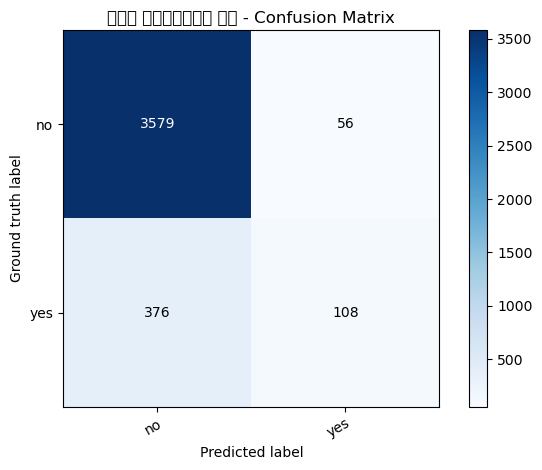

‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî ÏôÑÎ£å


In [17]:
# ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî
if 'best_predictions' in locals():
    print(f"üìä {best_model_name} Confusion Matrix Visualization")
    
    class_names = ["no", "yes"]
    cm = confusion_matrix(test_y['y'].values, (best_predictions > 0.5).astype(int))
    
    ax, fig = plot_confusion_matrix(
        cm, 
        class_names, 
        title=f"{best_model_name} - Confusion Matrix"
    )
    
    plt.show()
    
    print("‚úÖ ÌòºÎèô ÌñâÎ†¨ ÏãúÍ∞ÅÌôî ÏôÑÎ£å")
else:
    print("‚ö†Ô∏è ÏãúÍ∞ÅÌôîÌï† Î™®Îç∏Ïù¥ ÏóÜÏäµÎãàÎã§.")
    fig = None

In [18]:
# MLflowÏóê ÌòºÎèô ÌñâÎ†¨ Î°úÍ∑∏
if 'best_model_version' in locals() and fig is not None:
    try:
        print(f"üìù MLflowÏóê ÌòºÎèô ÌñâÎ†¨ Î°úÍ∑∏ Ï§ë...")
        print(f"   - Î™®Îç∏: {best_model_version.name} Î≤ÑÏ†Ñ {best_model_version.version}")
        
        mlflow.set_experiment(experiment_name)
        with mlflow.start_run(run_id=best_model_version.run_id):
            mlflow.log_figure(fig, "confusion_matrix.png")
            
            # Ï∂îÍ∞Ä Î©îÌä∏Î¶≠ Î°úÍ∑∏
            if predictions1 is not None and predictions2 is not None:
                mlflow.log_metric("test_auc_model1", auc1)
                mlflow.log_metric("test_auc_model2", auc2)
                mlflow.log_metric("test_accuracy_model1", acc1)
                mlflow.log_metric("test_accuracy_model2", acc2)
        
        print("‚úÖ MLflow Î°úÍ∑∏ ÏôÑÎ£å")
        
    except Exception as e:
        print(f"‚ö†Ô∏è MLflow Î°úÍ∑∏ Ïã§Ìå®: {e}")
else:
    print("‚ö†Ô∏è MLflow Î°úÍ∑∏Î•º ÏúÑÌïú Îç∞Ïù¥ÌÑ∞Í∞Ä ÏóÜÏäµÎãàÎã§.")

üìù MLflowÏóê ÌòºÎèô ÌñâÎ†¨ Î°úÍ∑∏ Ï§ë...
   - Î™®Îç∏: bank-marketing-model-00 Î≤ÑÏ†Ñ 2
üèÉ View run model-training-24-15-50-55 at: https://us-west-2.experiments.sagemaker.aws/#/experiments/1/runs/38d64b0d82594bb4b8ce2adb34d246c5
üß™ View experiment at: https://us-west-2.experiments.sagemaker.aws/#/experiments/1
‚úÖ MLflow Î°úÍ∑∏ ÏôÑÎ£å


## 10. Í≤∞Í≥º ÏöîÏïΩ Î∞è Ï†ÄÏû•

Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥ºÎ•º ÏöîÏïΩÌïòÍ≥† Îã§Ïùå ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©Ìï† Î≥ÄÏàòÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.

In [19]:
# Í≤∞Í≥º ÏöîÏïΩ
print("üìã Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º ÏöîÏïΩ")
print("=" * 50)

if 'best_model_name' in locals():
    print(f"üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: {best_model_name}")
    
    if predictions1 is not None and predictions2 is not None:
        print(f"\nüìä ÏÑ±Îä• ÎπÑÍµê:")
        print(f"   Î™®Îç∏ 1 (Î≥¥ÏàòÏ†Å): AUC={auc1:.4f}, Ï†ïÌôïÎèÑ={acc1:.4f}")
        print(f"   Î™®Îç∏ 2 (Ï†ÅÍ∑πÏ†Å): AUC={auc2:.4f}, Ï†ïÌôïÎèÑ={acc2:.4f}")
        
        # ÏÑ±Îä• Ï∞®Ïù¥ Í≥ÑÏÇ∞
        auc_diff = abs(auc1 - auc2)
        acc_diff = abs(acc1 - acc2)
        
        print(f"\nüìà ÏÑ±Îä• Ï∞®Ïù¥:")
        print(f"   AUC Ï∞®Ïù¥: {auc_diff:.4f}")
        print(f"   Ï†ïÌôïÎèÑ Ï∞®Ïù¥: {acc_diff:.4f}")
        
    print(f"\n‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: {len(test_x)} ÏÉòÌîå")
    print(f"‚úÖ ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÎπÑÏú®: {test_y['y'].mean():.3f}")
    
else:
    print("‚ùå Î™®Îç∏ ÌèâÍ∞ÄÎ•º ÏôÑÎ£åÌïòÏßÄ Î™ªÌñàÏäµÎãàÎã§.")

print("\n" + "=" * 50)
print("üéØ Î™®Îç∏ ÌèâÍ∞Ä ÏôÑÎ£å!")

üìã Î™®Îç∏ ÌèâÍ∞Ä Í≤∞Í≥º ÏöîÏïΩ
üèÜ ÏµúÍ≥† ÏÑ±Îä• Î™®Îç∏: Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏

üìä ÏÑ±Îä• ÎπÑÍµê:
   Î™®Îç∏ 1 (Î≥¥ÏàòÏ†Å): AUC=0.7826, Ï†ïÌôïÎèÑ=0.8956
   Î™®Îç∏ 2 (Ï†ÅÍ∑πÏ†Å): AUC=0.7863, Ï†ïÌôïÎèÑ=0.8951

üìà ÏÑ±Îä• Ï∞®Ïù¥:
   AUC Ï∞®Ïù¥: 0.0037
   Ï†ïÌôïÎèÑ Ï∞®Ïù¥: 0.0005

‚úÖ ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÌÅ¨Í∏∞: 4119 ÏÉòÌîå
‚úÖ ÏñëÏÑ± ÌÅ¥ÎûòÏä§ ÎπÑÏú®: 0.118

üéØ Î™®Îç∏ ÌèâÍ∞Ä ÏôÑÎ£å!


In [20]:
# Îã§Ïùå ÎÖ∏Ìä∏Î∂ÅÏóêÏÑú ÏÇ¨Ïö©Ìï† Î≥ÄÏàòÎì§ Ï†ÄÏû•
if 'best_model_name' in locals():
    %store best_model_name
    %store best_model_version
    
    if 'best_predictions' in locals():
        %store best_predictions
    
    print("‚úÖ Î≥ÄÏàò Ï†ÄÏû• ÏôÑÎ£å:")
    print(f"   - best_model_name: {best_model_name}")
    print(f"   - best_model_version: {best_model_version.version}")
    print(f"   - best_predictions: {len(best_predictions) if 'best_predictions' in locals() else 'N/A'} Í∞ú")
else:
    print("‚ö†Ô∏è Ï†ÄÏû•Ìï† Î≥ÄÏàòÍ∞Ä ÏóÜÏäµÎãàÎã§.")

Stored 'best_model_name' (str)
Stored 'best_model_version' (ModelVersion)
Stored 'best_predictions' (ndarray)
‚úÖ Î≥ÄÏàò Ï†ÄÏû• ÏôÑÎ£å:
   - best_model_name: Ï†ÅÍ∑πÏ†Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ Î™®Îç∏
   - best_model_version: 2
   - best_predictions: 4119 Í∞ú
